In [123]:
#Importamos la libreria pandas
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
#Importacion la clase train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Importamos la libreria de regresion lineal
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score #Importamos la libreria de metricas de regresion lineal


## Explique el problema a resolver. 

Se requiere predecir el  recuento del total de bicicletas de alquiler, incluidas las ocasionales y las registradas en función a ciertas caracteristicas que son tomadas en cuenta, entre las cuales tenemos (instant, dteday,season, yr,mnth,holiday,weekday	workingday,weathersit,temp,atemp,hum,windspeed,casual,registered) Todas estas caracteristicas son tomadas en cuenta para determinar total de bicicletas de alquiler	

## Descripción de la fuente del Dataset

Variable objetiva - X

	- instant: record index<br>
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
    
    Variable objetiva - cnt<br>
	- cnt: count of total rental bikes including both casual and registered


## Cargar el Dataset

In [124]:
#Cargamos el dataset 
df = pd.read_csv('day.csv')
#Cargamos los primeros 5 datos
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [125]:
df.describe()#Se muestra informacion estadistica del dataset 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [126]:
df.nunique()#Se observa los valores unicos 

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [127]:
df.isnull().sum()#Total de datos nulos 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [128]:
df.info()#Se observa el ripo de dato de cada columan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [129]:
df = df.drop(columns=['dteday'])#Se elimina la columna dteday 

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [130]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [131]:
# Variable objetivo y variables de entrada
VariableObjetivo=['cnt']
VariablesEntrada=['instant'	,'season',	'yr'	,'mnth',	'holiday',	'weekday'	,'workingday'	,'weathersit'	,'temp'	,'atemp',	'hum',	'windspeed'	,'casual'	,'registered']

In [132]:
X=df[VariablesEntrada].values
y=df[VariableObjetivo].values

In [133]:

VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [134]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [135]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 14)
(511, 1)
(220, 14)
(220, 1)


## Regresión Lineal

In [138]:
regresion = LinearRegression().fit(X_train, y_train) #Se crea el modelo de regresion lineal
 

In [142]:
# guardamos el resultado de la predicción del test
y_pred = regresion.predict(X_test)

# Mostramos las predicciones
# print(y_pred)

## Evaluación del Modelo

In [140]:
r2_score(y_test,y_pred)# Se calcula el coeficiente de determinacion R2

1.0

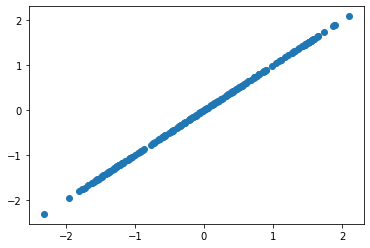

In [141]:
# Visualización de resultados
plt.scatter(y_test,y_pred)#Se puede observar 

Mediante el análisis de los datos de test y prueba, podemos apreciar en la gráfica que los elementos se estan ajustando al modelo de regreción lineal, con una precisión del 100% durante la predicción del total de bicicletas de alquiler. A pesar de las diferentes caracteristicas que posee el dataset el modelo mediante los datos que fueron utilizados para el entrenamiento, genera perfiles similares y trata de predecir con exactitud total de bicicletas de alquiler con las caracteristicas utilizadas para las pruebas.